# Logistic Regression

## Data Pre-processing

## 1. Data Load

In [ ]:
import pandas as pd
pd.set_option('display.max_row', 10)
candy = pd.read_csv("candy-data.csv")

candy

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,Twizzlers,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,Warheads,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,WelchÕs Fruit Snacks,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,WertherÕs Original Caramel,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


In [ ]:
candy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [ ]:
#결측치 확인
candy.isnull().sum()

competitorname    0
chocolate         0
fruity            0
caramel           0
peanutyalmondy    0
                 ..
bar               0
pluribus          0
sugarpercent      0
pricepercent      0
winpercent        0
Length: 13, dtype: int64

In [ ]:
#데이터 분포 확인
candy.describe()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,0.435294,0.447059,0.164706,0.164706,0.082353,0.082353,0.176471,0.247059,0.517647,0.478647,0.468882,50.316764
std,0.498738,0.500140,0.373116,0.373116,0.276533,0.276533,0.383482,0.433861,0.502654,0.282778,0.285740,14.714357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.011000,0.011000,22.445341
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.220000,0.255000,39.141056
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.465000,0.465000,47.829754
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.732000,0.651000,59.863998
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988000,0.976000,84.180290


In [ ]:
#필요 없는 열 제거
candy.drop(['competitorname'], axis = 1, inplace = True)
candy

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465
...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282
81,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898
82,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519
83,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308


## 2. Data Visualize

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

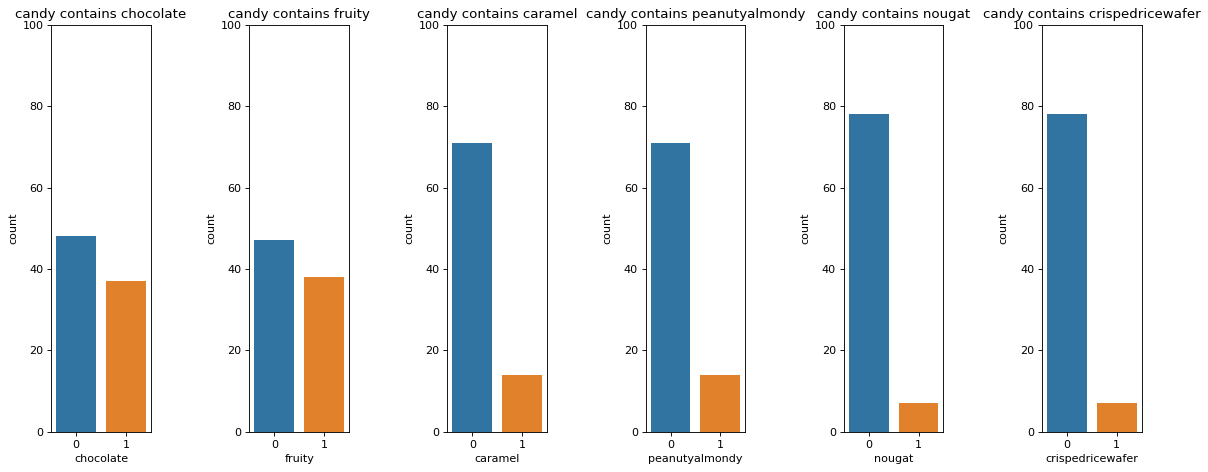

In [ ]:
# taste 속성
plt.figure(figsize=(15,6), dpi=80)

plt.subplot(161)
sns.countplot(x=candy['chocolate'])
plt.ylim([0, 100])
plt.title("candy contains chocolate")

plt.subplot(162)
sns.countplot(x=candy['fruity'])
plt.ylim([0, 100])
plt.title("candy contains fruity")

plt.subplot(163)
sns.countplot(x=candy['caramel'])
plt.ylim([0, 100])
plt.title("candy contains caramel")

plt.subplot(164)
sns.countplot(x=candy['peanutyalmondy'])
plt.ylim([0, 100])
plt.title("candy contains peanutyalmondy")

plt.subplot(165)
sns.countplot(x=candy['nougat'])
plt.ylim([0, 100])
plt.title("candy contains nougat")

plt.subplot(166)
sns.countplot(x=candy['crispedricewafer'])
plt.ylim([0, 100])
plt.title("candy contains crispedricewafer")

#ax.set_yscale('log')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'type of candy')

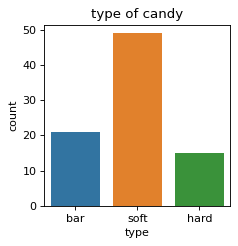

In [ ]:
#type 속성
def map_type(x,y):
    if x == 1 and y==0:
        return("hard")
    elif x==0 and y==1:
        return ("bar")
    elif x==0 and y==0:
        return("soft")
    elif x==1 and y==1:
        return("soft")

candy['type'] = candy[['hard','bar']].apply(lambda x: map_type(x['hard'],x['bar']) , axis=1)

plt.figure(figsize=(3,3), dpi=80)
sns.countplot(x=candy['type'])
plt.title("type of candy")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

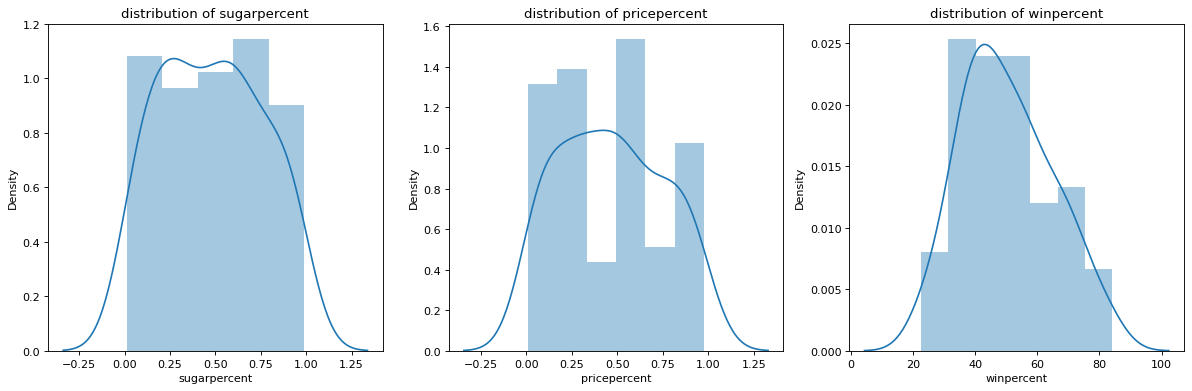

In [ ]:
#설문 결과
plt.figure(figsize=(15,5), dpi=80)
plt.subplot(1,3,1)
sns.distplot(candy['sugarpercent'])
plt.title("distribution of sugarpercent")

plt.subplot(1,3,2)
sns.distplot(candy['pricepercent'])
plt.title("distribution of pricepercent")

plt.subplot(1,3,3)
sns.distplot(candy['winpercent'])
plt.title("distribution of winpercent")

plt.tight_layout()
plt.show()

## 3. Data Preprocess

### Step1. 결측치 제거

In [ ]:
candy[(candy['chocolate']==0)&(candy['fruity']==0)&(candy['caramel']==0)&(candy['peanutyalmondy']==0)&(candy['nougat']==0)&(candy['crispedricewafer']==0)]

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,type
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,soft
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,soft
8,0,0,0,0,0,0,0,0,1,0.906,0.325,38.010963,soft
19,0,0,0,0,0,0,0,0,1,0.465,0.465,34.158958,soft
48,0,0,0,0,0,0,0,0,1,0.093,0.023,37.722336,soft
57,0,0,0,0,0,0,1,0,1,0.732,0.069,29.703691,hard


In [ ]:
#Taste를 나타내는 속성들 중 아무것도 나타나지 않은 속성이 있을 경우 결측치로 판단하고 해당 열 제거 
candy = candy.drop(index=[2, 3, 8, 19, 48, 57])

In [ ]:

mask = (candy.winpercent < 40)
candy.loc[mask, 'winpercent_cat'] = 0
mask = (candy.winpercent >= 40) 
candy.loc[mask, 'winpercent_cat'] = 1



display(candy)



,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,type,winpercent_cat
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,bar,1.0
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,bar,1.0
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,soft,1.0
5,1,0,0,1,0,0,0,1,0,0.465,0.767,50.347546,bar,1.0
6,1,0,1,1,1,0,0,1,0,0.604,0.767,56.914547,bar,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80,0,1,0,0,0,0,0,0,0,0.220,0.116,45.466282,soft,1.0
81,0,1,0,0,0,0,1,0,0,0.093,0.116,39.011898,hard,0.0
82,0,1,0,0,0,0,0,0,1,0.313,0.313,44.375519,soft,1.0
83,0,0,1,0,0,0,1,0,0,0.186,0.267,41.904308,hard,1.0


In [ ]:
corr = candy.corr(method='pearson')
pd.set_option('display.max_row', 20)
pd.set_option('display.max_columns', 20)
# corr.loc['winpercent_cat', :]
corr


,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,winpercent_cat
chocolate,1.000000,-0.852828,0.228730,0.361595,0.242939,0.332205,-0.369163,0.583669,-0.341683,0.086282,0.486617,0.614941,0.371451
fruity,-0.852828,1.000000,-0.380447,-0.446794,-0.300181,-0.300181,0.415720,-0.579289,0.342527,-0.067159,-0.519143,-0.479844,-0.255183
caramel,0.228730,-0.380447,1.000000,0.045055,0.321900,0.205248,-0.128571,0.321050,-0.271094,0.224949,0.239644,0.190160,0.041496
peanutyalmondy,0.361595,-0.446794,0.045055,1.000000,0.205248,-0.028055,-0.215385,0.246012,-0.204789,0.080578,0.297140,0.392507,0.193970
nougat,0.242939,-0.300181,0.321900,0.205248,1.000000,-0.097222,-0.144707,0.518188,-0.315777,0.122557,0.141810,0.185669,0.079099
crispedricewafer,0.332205,-0.300181,0.205248,-0.028055,-0.097222,1.000000,-0.144707,0.417358,-0.226683,0.065568,0.324647,0.316653,0.181540
hard,-0.369163,0.415720,-0.128571,-0.215385,-0.144707,-0.144707,1.000000,-0.279256,-0.005875,0.056760,-0.243624,-0.321779,-0.263452
bar,0.583669,-0.579289,0.321050,0.246012,0.518188,0.417358,-0.279256,1.000000,-0.609387,0.089978,0.511321,0.409680,0.284439
pluribus,-0.341683,0.342527,-0.271094,-0.204789,-0.315777,-0.226683,-0.005875,-0.609387,1.000000,-0.006401,-0.208448,-0.233911,-0.050856
sugarpercent,0.086282,-0.067159,0.224949,0.080578,0.122557,0.065568,0.056760,0.089978,-0.006401,1.000000,0.339720,0.237022,0.150739


### Step2. Feature에 따른 winpercent_cat 비교

In [ ]:
# 특정 feature에 따른 이기는지 여부(winpercent_cat) 비교 함수
def bar_chart2(feature):
    winpercent_0 = candy[candy['winpercent_cat']==0][feature].value_counts()
    winpercent_1 = candy[candy['winpercent_cat']==1][feature].value_counts()
    df_choco = pd.DataFrame([winpercent_0,winpercent_1])
    df_choco.index = ['winpercent_0','winpercent_1']
    df_choco.plot(kind='bar',stacked=True, figsize=(10,5))

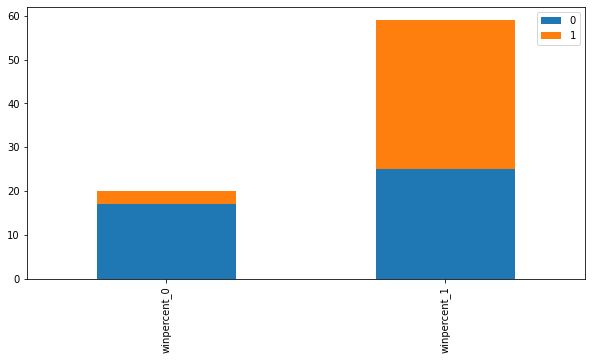

In [ ]:
bar_chart2('chocolate')

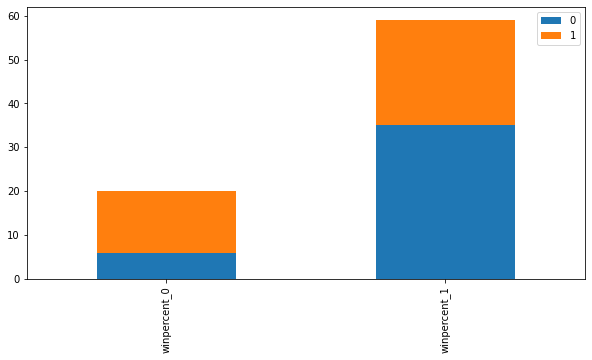

In [ ]:
bar_chart2('fruity') 

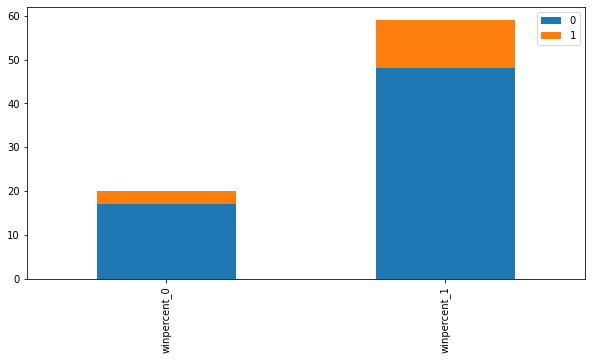

In [ ]:
bar_chart2('caramel') 

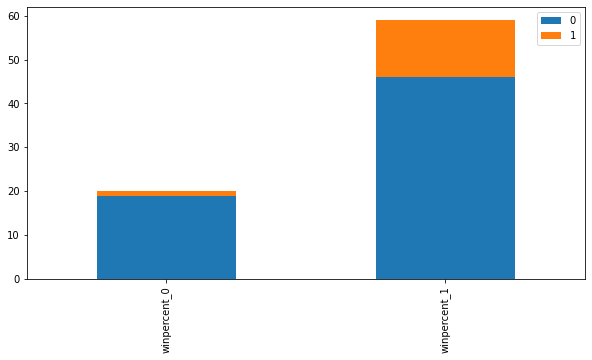

In [ ]:
bar_chart2('peanutyalmondy') 

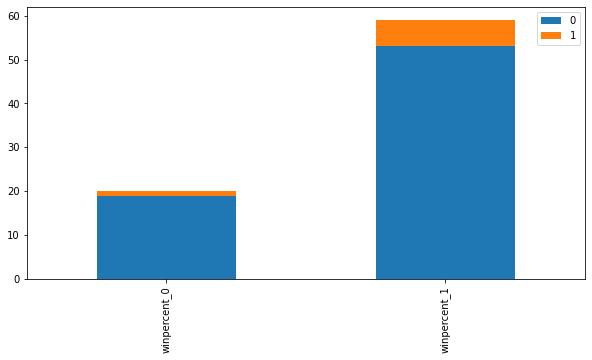

In [ ]:
bar_chart2('nougat') 

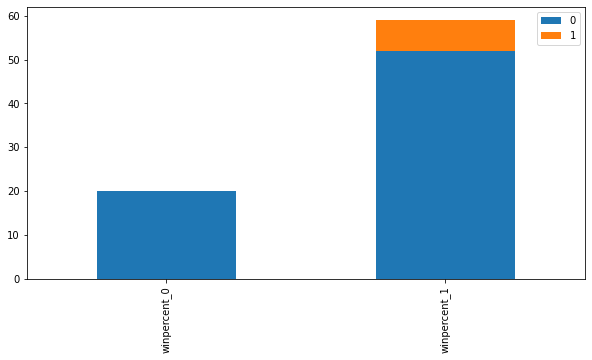

In [ ]:
bar_chart2('crispedricewafer') 

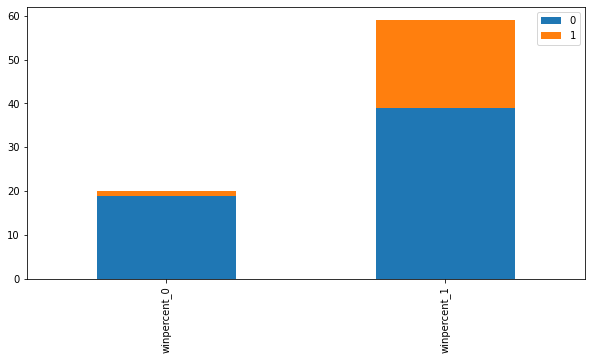

In [ ]:
bar_chart2('bar')  

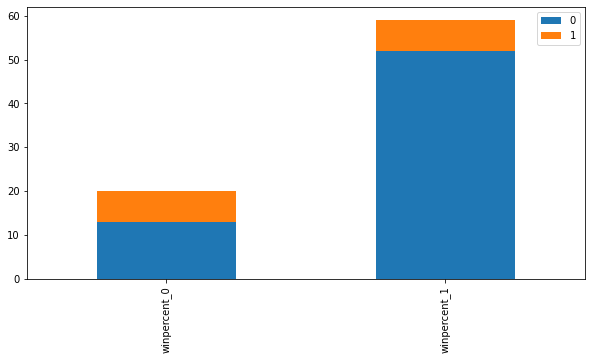

In [ ]:
bar_chart2('hard')  

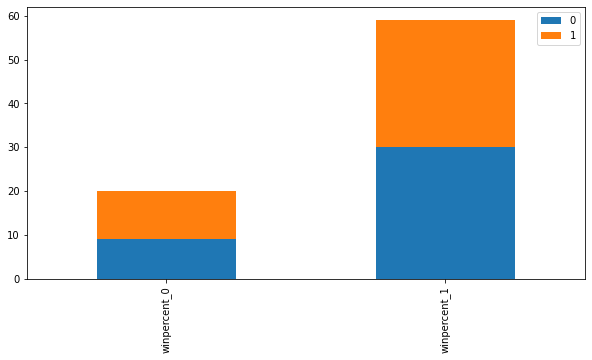

In [ ]:
bar_chart2('pluribus') 

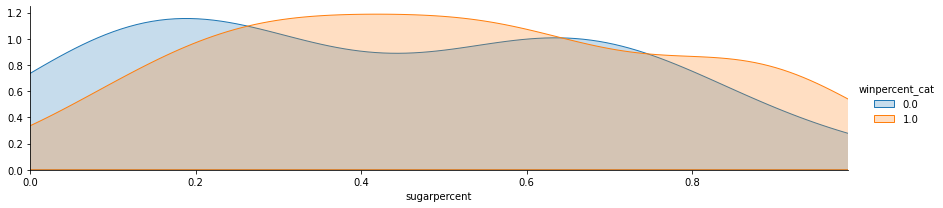

In [ ]:
# sugarpercent에 따른 이기는지 여부(winpercent_cat) (o : 1, x: 0)비교

import matplotlib.pyplot as plt
import seaborn as sns

facet = sns.FacetGrid(candy, hue="winpercent_cat", aspect=4) #sugarpercent	pricepercent	winpercent
facet.map(sns.kdeplot, 'sugarpercent', shade=True)
facet.set(xlim=(0, candy['sugarpercent'].max()))
facet.add_legend()
sns.axes_style("darkgrid")

plt.show()


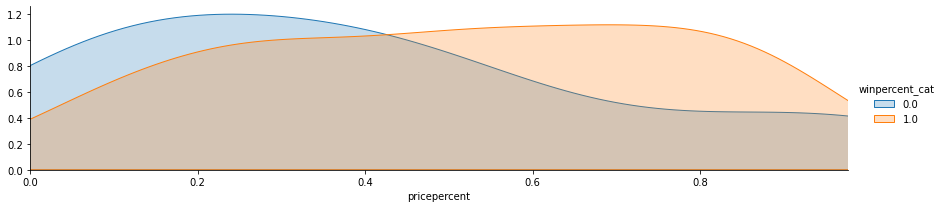

In [ ]:
# pricepercent에 따른 이기는지 여부(winpercent_cat) (o : 1, x: 0)비교
facet2 = sns.FacetGrid(candy, hue="winpercent_cat", aspect=4)
facet2.map(sns.kdeplot, 'pricepercent', shade=True)
facet2.set(xlim=(0, candy['pricepercent'].max()))
facet2.add_legend()

plt.show() 


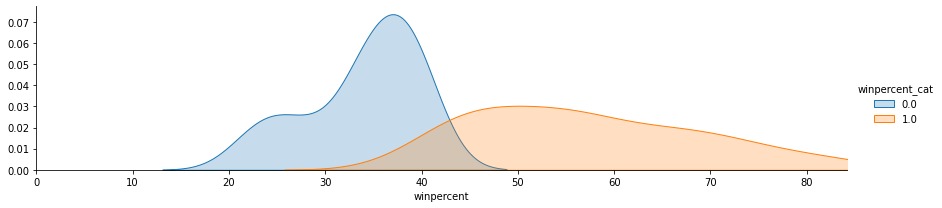

In [ ]:
# winpercent 따른 이기는지 여부(winpercent_cat) (o : 1, x: 0)비교
facet2 = sns.FacetGrid(candy, hue="winpercent_cat", aspect=4)
facet2.map(sns.kdeplot, 'winpercent', shade=True)
facet2.set(xlim=(0, candy['winpercent'].max()))
facet2.add_legend()

plt.show() 

In [ ]:
#유의미하다고 생각되는 column들을 선택한다.
# X = 'chocolate', 'hard', 'bar',  'pricepercent'
# Y =  'winpercent'

candy_data = candy.loc[:,['chocolate', 'hard', 'bar',  'pricepercent', 'winpercent_cat']]

In [ ]:
candy_data

,chocolate,hard,bar,pricepercent,winpercent_cat
0,1,0,1,0.860,1.0
1,1,0,1,0.511,1.0
4,0,0,0,0.511,1.0
5,1,0,1,0.767,1.0
6,1,0,1,0.767,1.0
...,...,...,...,...,...
80,0,0,0,0.116,1.0
81,0,1,0,0.116,0.0
82,0,0,0,0.313,1.0
83,0,1,0,0.267,1.0


In [ ]:
# candy_data['winpercent'] = candy_data['winpercent'] / 100

In [ ]:
# candy_data = candy_data.loc[:,['fruity', 'pluribus', 'pricepercent',  'chocolate']]

### Step3. For Statsmodels

In [ ]:
# Features for statsmodels
train_features_st = candy_data[candy_data.columns[:-1]]
train_features_st['intercept'] = 1

train_features_st

,chocolate,hard,bar,pricepercent,intercept
0,1,0,1,0.860,1
1,1,0,1,0.511,1
4,0,0,0,0.511,1
5,1,0,1,0.767,1
6,1,0,1,0.767,1
...,...,...,...,...,...
80,0,0,0,0.116,1
81,0,1,0,0.116,1
82,0,0,0,0.313,1
83,0,1,0,0.267,1


In [ ]:
# target for statsmodels
train_target_st = candy_data[candy_data.columns[-1]] # 또는 data_ohe['Survived']
train_target_st

0     1.0
1     1.0
4     1.0
5     1.0
6     1.0
     ... 
80    1.0
81    0.0
82    1.0
83    1.0
84    1.0
Name: winpercent_cat, Length: 79, dtype: float64

### Target Variable

Question: Can you predict whether a candy likely to win based on its other features?

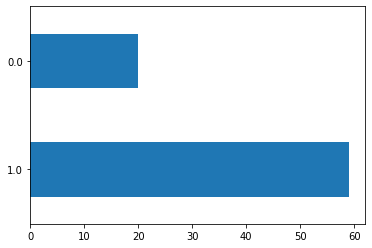

In [ ]:
candy_data['winpercent_cat'].value_counts().plot.barh();

### Step4. Imbalanced data 문제 해결 & Train;Validation data 분리

In [ ]:
#shuffle & undersample
import sklearn
x_shuffled = sklearn.utils.shuffle(train_features_st, random_state=2021)
y_shuffled =sklearn.utils.shuffle(train_target_st, random_state=2021)

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
X_resampled_under, y_resampled_under = RandomUnderSampler(random_state=2021).fit_resample(x_shuffled, y_shuffled)
X_resampled_over, y_resampled_over = RandomOverSampler(random_state=2021).fit_resample(x_shuffled, y_shuffled)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

In [ ]:
import pandas as pd
print(pd.DataFrame(y_resampled_under).value_counts())
print(pd.DataFrame(y_resampled_over).value_counts())

1.0    20
0.0    20
dtype: int64
1.0    59
0.0    59
dtype: int64


In [ ]:
# train: validation = 7:3 분리 - undersample
from sklearn.model_selection import train_test_split
training_data_under, validation_data_under , training_labels_under, validation_labels_under = train_test_split(X_resampled_under, y_resampled_under, test_size = 0.3, random_state = 20)

In [ ]:
# train: validation = 7:3 분리 - oversample
from sklearn.model_selection import train_test_split
training_data_over, validation_data_over , training_labels_over, validation_labels_over = train_test_split(X_resampled_over, y_resampled_over, test_size = 0.3, random_state = 25)

# Modeling


## 1. Under Sampling

In [ ]:
import statsmodels.api as sm
model_sm = sm.Logit(training_labels_under, training_data_under) #로지스틱 회귀분석 시행
fit_result_sm = model_sm.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimization terminated successfully.
         Current function value: 0.613763
         Iterations 6


In [ ]:
fit_result_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   28
Model:                          Logit   Df Residuals:                       23
Method:                           MLE   Df Model:                            4
Date:                Sat, 24 Apr 2021   Pseudo R-squ.:                  0.1113
Time:                        05:45:08   Log-Likelihood:                -17.185
converged:                       True   LL-Null:                       -19.337
Covariance Type:            nonrobust   LLR p-value:                    0.3666
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.6542      1.027      0.637      0.524      -1.359       2.667
x2            -0.4514      1.081     -0.418      0.676      -2.569       1.667
x3             1.1283      1.320      0.855      0.393      -1.459       3.715
x4             0.6475      1.453      0.446      0.656      -2.200       3.495
const         -0.5188      0.806     -0.643      0.520      -2.099       1.061
==============================================================================
"""

In [ ]:
# Odds ratio
import numpy as np
np.exp(fit_result_sm.params)

## reference
## intercept는 Odds ratio 해석 x

array([1.92352018, 0.63675176, 3.09052628, 1.91075486, 0.59522498])

In [ ]:
# Probability 값 in train
fit_result_sm.predict(training_data_under)
# 기존 data에 pbrobablity값을 추가하고 싶다면?
# data_ohe["predict_prob"] = fit_result_sm.predict(train_features_st)

array([0.39085826, 0.8650737 , 0.31060141, 0.28239017, 0.75141193,
       0.31869962, 0.63572629, 0.84359239, 0.44578175, 0.42351049,
       0.4145092 , 0.83125588, 0.37829277, 0.39085826, 0.42351049,
       0.45315178, 0.54680964, 0.52825552, 0.39454786, 0.42351049,
       0.61448698, 0.27925174, 0.8650737 , 0.63572629, 0.63572629,
       0.68293644, 0.39085826, 0.84359239])

In [ ]:
# Probability 값 in validation
predict_probability_valid_y_under = fit_result_sm.predict(validation_data_under)
predict_probability_valid_y_under

array([0.34540037, 0.39085826, 0.31869962, 0.29006232, 0.49445409,
       0.86062985, 0.44578175, 0.45315178, 0.42351049, 0.28846489,
       0.42351049, 0.61448698])

In [ ]:
# 경계값cut off value에 따라 0,1 값 변환
def change_cutoff(pred_prob_y, cutoff):
    Y_change = pred_prob_y.copy()
    Y_change[Y_change > cutoff] = 1
    Y_change[Y_change <= cutoff] = 0
    return(Y_change.astype(int))

### 1) 경계값 : 0.5

In [ ]:
pred_y_05 = change_cutoff(predict_probability_valid_y_under, 0.5)
pred_y_05

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [ ]:
# Confusion Matrix 방법1
# from sklearn.metrics import confusion_matrix
# confusion_matrix(validation_labels, model.predict(validation_data))
## 여기서 model은 fit_result_sm 또는 fit_result_skl
from sklearn.metrics import confusion_matrix
confusion_matrix(validation_labels_under, pred_y_05)

# Confusion Matrix 설명

#          예측값
# 실제값  TN   FP
#         FN   TP

# 기준: y=0: Negative, y=1: Positive
# 기준: y=0: 사망, y=1: 생존

array([[7, 0],
       [3, 2]])

In [ ]:
# Confusion Matrix 방법2
import numpy as np
import pandas as pd
y_actu = pd.Series(validation_labels_under, name='Actual') # validation_labels는 array형태여야함
y_pred_05 = pd.Series(pred_y_05, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred_05)

df_confusion

# Confusion Matrix 설명

#          예측값
# 실제값  TN   FP
#         FN   TP

# 기준: y=0: Negative, y=1: Positive
# 기준: y=0: 사망, y=1: 생존

Predicted,0,1
Actual,,
0.0,7,0
1.0,3,2


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Accuracy: {0: .4f}'.format(accuracy_score(validation_labels_under, pred_y_05)))
print('precision: {0: .4f}'.format(precision_score(validation_labels_under, pred_y_05)))
print('recall: {0: .4f}'.format(recall_score(validation_labels_under, pred_y_05)))
print('f1_score: {0: .4f}'.format(f1_score(validation_labels_under, pred_y_05)))
print('AUC: {0: .4f}'.format(roc_auc_score(validation_labels_under, pred_y_05)))

Accuracy:  0.7500
precision:  1.0000
recall:  0.4000
f1_score:  0.5714
AUC:  0.7000


### 2) 경계값 : 0.7

In [ ]:
pred_y_07 = change_cutoff(predict_probability_valid_y_under, 0.7)
pred_y_07

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
# Confusion Matrix 방법1
# from sklearn.metrics import confusion_matrix
# confusion_matrix(validation_labels, model.predict(validation_data))
## 여기서 model은 fit_result_sm 또는 fit_result_skl
from sklearn.metrics import confusion_matrix
confusion_matrix(validation_labels_under, pred_y_07)

# Confusion Matrix 설명

#          예측값
# 실제값  TN   FP
#         FN   TP

# 기준: y=0: Negative, y=1: Positive
# 기준: y=0: 사망, y=1: 생존

array([[7, 0],
       [4, 1]])

In [ ]:
# Confusion Matrix 방법2
import numpy as np
import pandas as pd
y_actu = pd.Series(validation_labels_under, name='Actual') # validation_labels는 array형태여야함
y_pred_07 = pd.Series(pred_y_07, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred_07)

df_confusion

# Confusion Matrix 설명

#          예측값
# 실제값  TN   FP
#         FN   TP

# 기준: y=0: Negative, y=1: Positive
# 기준: y=0: 사망, y=1: 생존

Predicted,0,1
Actual,,
0.0,7,0
1.0,4,1


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Accuracy: {0: .4f}'.format(accuracy_score(validation_labels_under, pred_y_07)))
print('precision: {0: .4f}'.format(precision_score(validation_labels_under, pred_y_07)))
print('recall: {0: .4f}'.format(recall_score(validation_labels_under, pred_y_07)))
print('f1_score: {0: .4f}'.format(f1_score(validation_labels_under, pred_y_07)))
print('AUC: {0: .4f}'.format(roc_auc_score(validation_labels_under, pred_y_07)))

Accuracy:  0.6667
precision:  1.0000
recall:  0.2000
f1_score:  0.3333
AUC:  0.6000


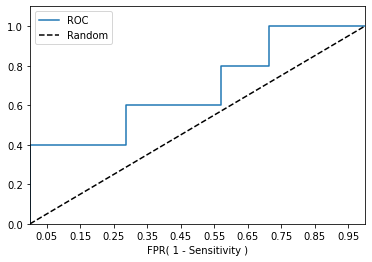

In [ ]:
from sklearn.metrics import roc_curve

def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
  
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1.1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    # plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
  
roc_curve_plot(validation_labels_under, predict_probability_valid_y_under)

# 아까 modeling에서 predict_probability_valid_y = fit_result_sm.predict(validation_data) 을 했음

## 2. Over Sampling

In [ ]:
import statsmodels.api as sm
model_sm = sm.Logit(training_labels_over, training_data_over) #로지스틱 회귀분석 시행
fit_result_sm = model_sm.fit()

Optimization terminated successfully.
         Current function value: 0.590907
         Iterations 6


In [ ]:
fit_result_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                   82
Model:                          Logit   Df Residuals:                       77
Method:                           MLE   Df Model:                            4
Date:                Sat, 24 Apr 2021   Pseudo R-squ.:                  0.1442
Time:                        05:45:16   Log-Likelihood:                -48.454
converged:                       True   LL-Null:                       -56.618
Covariance Type:            nonrobust   LLR p-value:                  0.002609
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7665      0.826      0.928      0.353      -0.853       2.386
x2            -0.8400      0.598     -1.405      0.160      -2.012       0.332
x3             1.4343      1.112      1.290      0.197      -0.745       3.614
x4             0.1107      0.949      0.117      0.907      -1.750       1.972
const         -0.4049      0.470     -0.861      0.389      -1.327       0.517
==============================================================================
"""

In [ ]:
# Odds ratio
import numpy as np
np.exp(fit_result_sm.params)

## reference
## intercept는 Odds ratio 해석 x

array([2.15226076, 0.43171971, 4.19680893, 1.11707695, 0.6670113 ])

In [ ]:
# Probability 값 in train
fit_result_sm.predict(training_data_over)
# 기존 data에 pbrobablity값을 추가하고 싶다면?
# data_ohe["predict_prob"] = fit_result_sm.predict(train_features_st)

array([0.24007685, 0.86441691, 0.22988786, 0.40879095, 0.42066854,
       0.22469623, 0.24267183, 0.8662233 , 0.86441691, 0.40879095,
       0.41377709, 0.40321059, 0.40321059, 0.40321059, 0.40756066,
       0.40321059, 0.40598439, 0.40102791, 0.61529588, 0.22988786,
       0.40879095, 0.22469623, 0.23240639, 0.22988786, 0.86441691,
       0.8662233 , 0.86198524, 0.86961191, 0.8662233 , 0.60674402,
       0.2255847 , 0.86961191, 0.22423367, 0.22988786, 0.59158908,
       0.40321059, 0.42034479, 0.59158908, 0.41254227, 0.42631791,
       0.22581688, 0.40691923, 0.86946119, 0.24267183, 0.40321059,
       0.40598439, 0.40846989, 0.41254227, 0.22875298, 0.22423367,
       0.40879095, 0.42066854, 0.86888207, 0.86961191, 0.40879095,
       0.40879095, 0.40879095, 0.86770456, 0.41377709, 0.2255847 ,
       0.40321059, 0.40879095, 0.40879095, 0.41377709, 0.42631791,
       0.86770456, 0.40321059, 0.22581688, 0.86350603, 0.40321059,
       0.22581688, 0.40879095, 0.59687478, 0.23355391, 0.39116

In [ ]:
# Probability 값 in validation
predict_probability_valid_y_over = fit_result_sm.predict(validation_data_over)
predict_probability_valid_y_over

array([0.61193594, 0.40598439, 0.22898746, 0.42066854, 0.22581688,
       0.22581688, 0.86770456, 0.61225139, 0.60303954, 0.2255847 ,
       0.2255847 , 0.22988786, 0.59191005, 0.60303954, 0.40321059,
       0.22469623, 0.41377709, 0.23355391, 0.86961191, 0.40879095,
       0.41377709, 0.86888207, 0.86770456, 0.86888207, 0.60303954,
       0.61529588, 0.75292894, 0.86441691, 0.60674402, 0.58971526,
       0.60674402, 0.40879095, 0.40321059, 0.42631791, 0.60674402,
       0.60674402])

### 1) 경계값 : 0.5

In [ ]:
pred_y_05 = change_cutoff(predict_probability_valid_y_over, 0.5)
pred_y_05

array([1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [ ]:
# Confusion Matrix 방법1
# from sklearn.metrics import confusion_matrix
# confusion_matrix(validation_labels, model.predict(validation_data))
## 여기서 model은 fit_result_sm 또는 fit_result_skl
from sklearn.metrics import confusion_matrix
confusion_matrix(validation_labels_over, pred_y_05)

# Confusion Matrix 설명

#          예측값
# 실제값  TN   FP
#         FN   TP

# 기준: y=0: Negative, y=1: Positive
# 기준: y=0: 사망, y=1: 생존

array([[14,  1],
       [ 3, 18]])

In [ ]:
# Confusion Matrix 방법2
import numpy as np
import pandas as pd
y_actu = pd.Series(validation_labels_over, name='Actual') # validation_labels는 array형태여야함
y_pred_05 = pd.Series(pred_y_05, name='Predicted')
df_confusion = pd.crosstab(y_actu, pred_y_05)

df_confusion

# Confusion Matrix 설명

#          예측값
# 실제값  TN   FP
#         FN   TP

# 기준: y=0: Negative, y=1: Positive
# 기준: y=0: 사망, y=1: 생존

col_0,0,1
Actual,,
0.0,14,1
1.0,3,18


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Accuracy: {0: .4f}'.format(accuracy_score(validation_labels_over, pred_y_05)))
print('precision: {0: .4f}'.format(precision_score(validation_labels_over, pred_y_05)))
print('recall: {0: .4f}'.format(recall_score(validation_labels_over, pred_y_05)))
print('f1_score: {0: .4f}'.format(f1_score(validation_labels_over, pred_y_05)))
print('AUC: {0: .4f}'.format(roc_auc_score(validation_labels_over, pred_y_05)))

Accuracy:  0.8889
precision:  0.9474
recall:  0.8571
f1_score:  0.9000
AUC:  0.8952


### 2) 경계값 : 0.7

In [ ]:
pred_y_07 = change_cutoff(predict_probability_valid_y_over, 0.7)
pred_y_07

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
# Confusion Matrix 방법1
# from sklearn.metrics import confusion_matrix
# confusion_matrix(validation_labels, model.predict(validation_data))
## 여기서 model은 fit_result_sm 또는 fit_result_skl
from sklearn.metrics import confusion_matrix
confusion_matrix(validation_labels_over, pred_y_07)

# Confusion Matrix 설명

#          예측값
# 실제값  TN   FP
#         FN   TP

# 기준: y=0: Negative, y=1: Positive
# 기준: y=0: 사망, y=1: 생존

array([[15,  0],
       [14,  7]])

In [ ]:
# Confusion Matrix 방법2
import numpy as np
import pandas as pd
y_actu = pd.Series(validation_labels_over, name='Actual') # validation_labels는 array형태여야함
y_pred_07 = pd.Series(pred_y_07, name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred_07)

df_confusion

# Confusion Matrix 설명

#          예측값
# 실제값  TN   FP
#         FN   TP

# 기준: y=0: Negative, y=1: Positive
# 기준: y=0: 사망, y=1: 생존

Predicted,0,1
Actual,,
0.0,15,0
1.0,14,7


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print('Accuracy: {0: .4f}'.format(accuracy_score(validation_labels_over, pred_y_07)))
print('precision: {0: .4f}'.format(precision_score(validation_labels_over, pred_y_07)))
print('recall: {0: .4f}'.format(recall_score(validation_labels_over, pred_y_07)))
print('f1_score: {0: .4f}'.format(f1_score(validation_labels_over, pred_y_07)))
print('AUC: {0: .4f}'.format(roc_auc_score(validation_labels_over, pred_y_07)))

Accuracy:  0.6111
precision:  1.0000
recall:  0.3333
f1_score:  0.5000
AUC:  0.6667


### 3) roc_curve

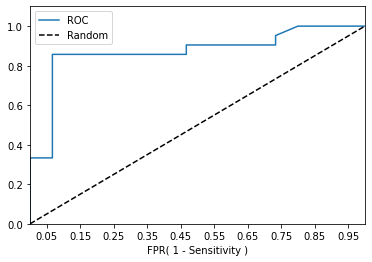

In [ ]:
roc_curve_plot(validation_labels_over, predict_probability_valid_y_over)

In [ ]:
# candy.groupby(['hard','bar', 'pluribus']).count()
# # 
# # one hot encoding인 bar, hard, pluribus에서 encoding되어 있지 않고 
# mask = (candy.hard == 0) & (candy.bar==0) & (candy.pluribus ==0)
# candy.loc[mask, 'pluribus'] = 1
# display(candy)

In [ ]:


# # Probability 값 in train
# fit_result_sm.predict(training_data_under)
# # 기존 data에 pbrobablity값을 추가하고 싶다면?
# # data_ohe["predict_prob"] = fit_result_sm.predict(train_features_st)